# About the Project
In this project, we will answer:

1. Which store has minimum and maximum sales?

2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3. Which store/s has good quarterly growth rate in Q3’2012

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5. Provide a monthly and semester view of sales in units and give insights

6. Build prediction to forecast demand.


In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [3]:
store_data = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/DataScience_ML_DL_Projects/MachineLearning/Retail_Analysis_Walmart/Walmart_Store_sales.csv')
store_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Info

The sales data are available for 45 stores for a duration of 2010-02-05 to 2012-11-01

The features are

a. Store - The store number
b. Date - The week of sales
c. Weekly_sales - Weekly sales for a store
d. Holiday_flag - 1 for week being holiday and 0 being non-holiday week
e. Temperature - Temperature on sale day.
f. Fuel price - fuel price in the region.
g. CPI - consumer price index
h. Unemployment - prevailing unemployment rate.

In [5]:
#converting date to date time format
store_data['Date'] = pd.to_datetime(store_data['Date'])
store_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
store_data['Date'][0]

Timestamp('2010-05-02 00:00:00')

In [7]:
#checking out null entries in the data
store_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#splitting date into Day month year
store_data['Day'] = pd.DatetimeIndex(store_data['Date']).day
store_data['Month'] = pd.DatetimeIndex(store_data['Date']).month
store_data['Year']= pd.DatetimeIndex(store_data['Date']).year

store_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


#### 1. Find out store having minimum and maximum sales 

Text(0, 0.5, 'Total Sales')

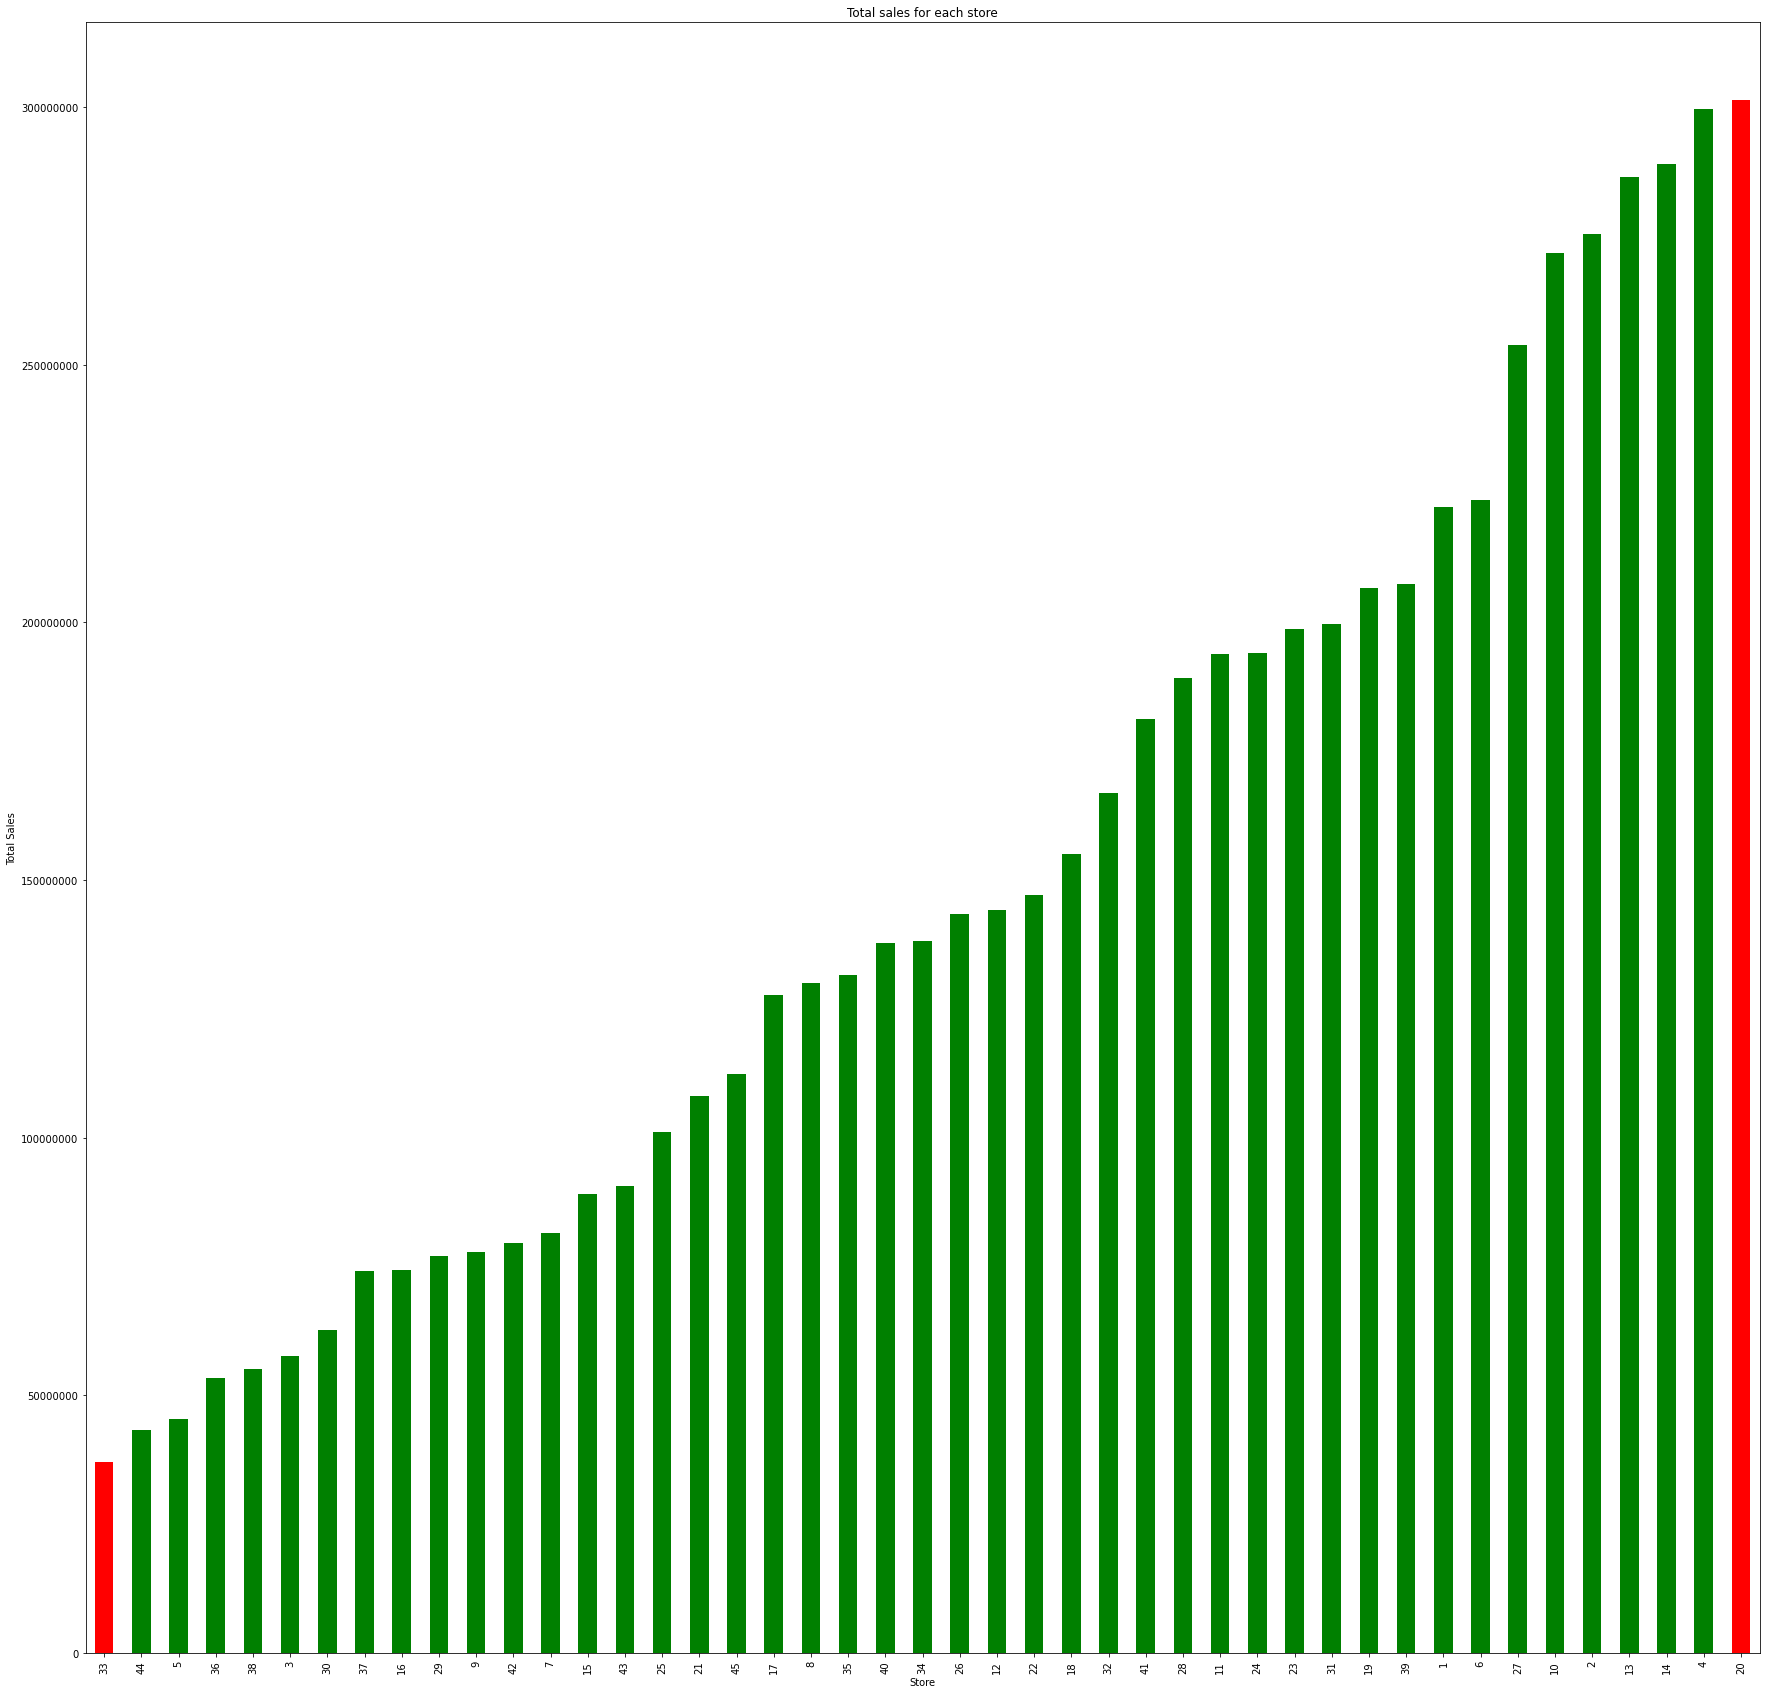

In [14]:
plt.figure(figsize=(30,30))

#finding out total value of weekly sales per store and then soring it
weekly_sales_per_store = store_data.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_store = np.array(weekly_sales_per_store)


# Assigning specific color for the stores that have min and max sales

colors = ['green' if ((x< max(total_sales_store)) and (x>min(total_sales_store))) else 'red' for x in total_sales_store]

axes = weekly_sales_per_store.plot(kind='bar', color=colors)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

Min - 33
Max - 20

### 2. Which store has maximum standard deviation i.e sales vary a lot. Also, find out coeff of mean to standard deviation.

In [18]:
data_std = pd.DataFrame(store_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))

print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store has maximum standard deviation is 14 with 317570 $


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The sales Distribution of Store 14')

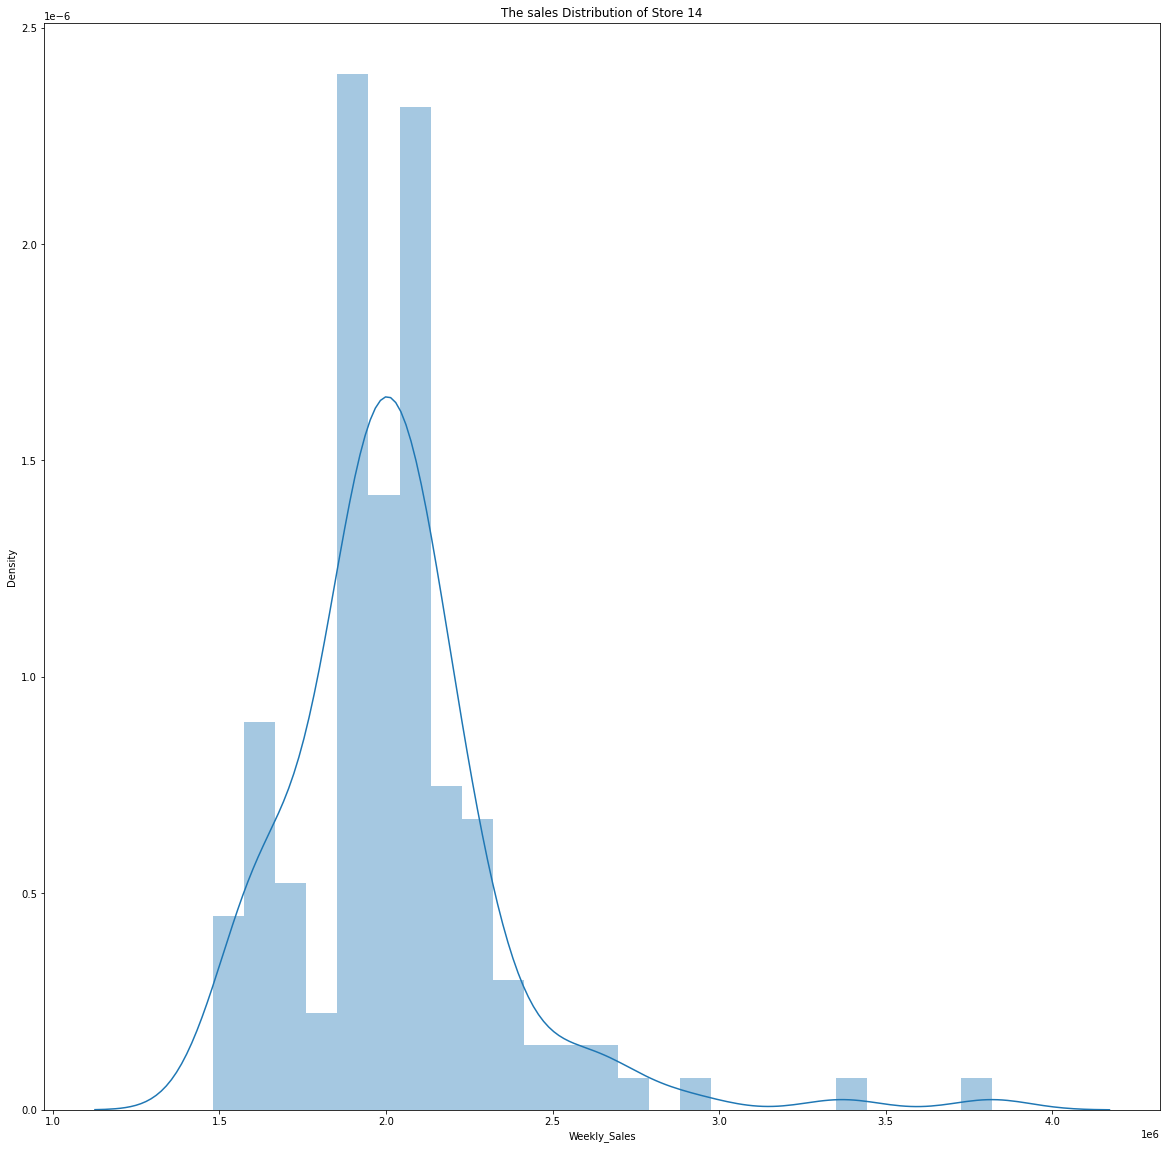

In [20]:
#Distribution of store that has maximum standard deviation
plt.figure(figsize=(20,20))
sns.distplot(store_data[store_data['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The sales Distribution of Store '+ str(data_std.head(1).index[0]))

In [22]:
# coefficient of mean to standard deviation
coeff_mean_std = pd.DataFrame(store_data.groupby('Store')['Weekly_Sales'].std()/store_data.groupby('Store')['Weekly_Sales'].mean())
coeff_mean_std = coeff_mean_std.rename(columns={'Weekly_Sales': 'Coefficient of mean to standard deviation'})
coeff_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


### 3. Which store has good quarterly growth in Q3'2012

In [26]:
# one in the duration of logged data 's sum
q3 = store_data[(store_data['Date']>'2012-07-01') & (store_data['Date']<'2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

print("Max sale::"+ str(q3.max()))
print("Store index::"+ str(q3.idxmax()))

Max sale::25652119.35
Store index::4


#### 4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Holiday Events:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


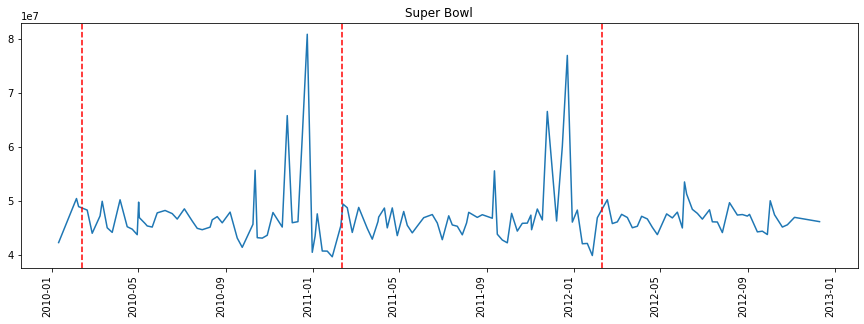

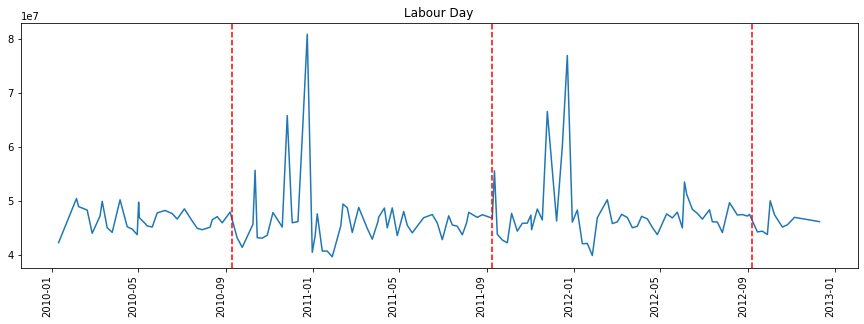

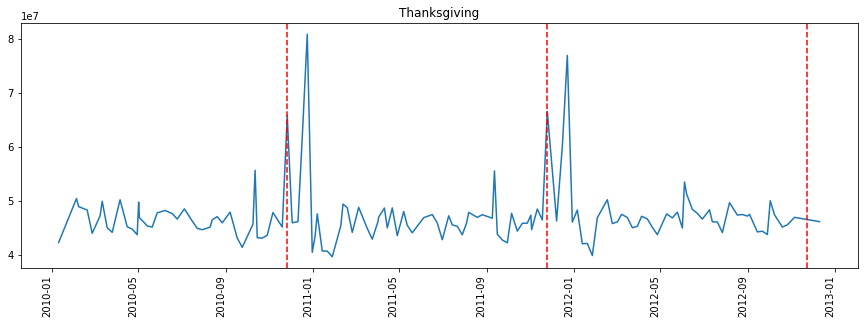

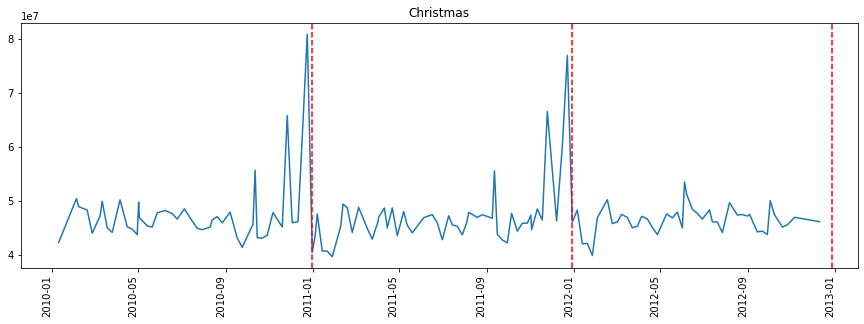

In [31]:
# finding out visually by plotting sales plot

def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = store_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')






The sales increased during thanksgiving and the sales decreased during christmas